# WORKFLOW GOAL 

### Objective:

The objective of this project is to preprocess the Titanic dataset, train a machine learning model to predict survival on the Titanic, optimize the model's performance through hyperparameter tuning, and deploy the optimized model for future predictions.

## Steps to Achieve the Objective:

### Data Preprocessing-

Handle missing values by modification or removal.
Encode categorical variables to numerical format.
Perform basic exploratory data analysis (EDA) to understand the dataset.

### Model Selection and Training:
Choose a suitable machine learning model (e.g., Logistic Regression, Decision Tree).
Split the dataset into training and testing sets.
Train the model on the training set.

### Model Evaluation-
Evaluate the model's performance using relevant metrics (e.g., accuracy, precision, recall).

### Model Optimization-
perform basic hyperparameter tuning to improve the model performance

### Conclusion-
bind all code, including data preprocessing, model training, evaluation, hyperparameter tuning, and deployment, into a Jupyter Notebook 


# DATA PREPROCESSING

## LOADING THE REQUIRED LIBRARIES

In [207]:
import numpy as np  #Data analysis and manipulation library
import pandas as pd
import seaborn as sns # visualisation libraries
import matplotlib.pyplot as plt

# Import the titanic dataset

In [208]:
df = sns.load_dataset("titanic")

# fetching the first five columns of the dataset

In [209]:
df.head(15)
    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Fetching the shape of the dataset

In [90]:
df.shape

(891, 15)

### There are 891 rows and 15 columns in the dataset

# Fetching all the columns

In [91]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

### Categorical Datatypes:

survived

pclass

sex

sibsp

parch

embarked

adult_male

who

embark_town

alive

alone

## Numerical Datatypes
 
 age 
 
 fare
 



## Mixed Datatypes

Name

Deck- alphanumeric

### missing values

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### age: 177 missing values out of 891 total entries.
### embarked: 2 missing values out of 891 total entries.
### deck: 688 missing values out of 891 total entries.This column has only 203 non-null values

## we will drop the deck column as there are more than 70 percent of the missing values

In [216]:
df.drop(columns=["deck"],inplace=True)

In [217]:
df.shape #checking the column

(891, 14)

In [218]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

### now we will fill the age null values with c median

In [219]:
df["age"]=df["age"].fillna(df["age"].median())

### we will fill the embarked column with highest occuring value

In [220]:
df["embarked"].value_counts() ##checking the highest occuiring value using value counts

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [221]:
# since s is the highest occuring so we will fill the embarked missing values with s

In [224]:
df["embark_town"].fillna("S", inplace = True)

In [225]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Now we have no missing values in our dataset

### Fetching the basic info of the data

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### The dataset includes 891 entries 
### Passengers' age were from  29 years to 80 years, with a standard deviation of 13.01
### Fare prices ranged widely, from a minimum of 0 to a maximum of 512.3 currency units.
### average fare was 32 dollars
### Most passengers (over 50%) did not travel with siblings or spouses (sibsp).
### About 62% of passengers were in the lowest socioeconomic class (pclass 3), based on the median value.

In [228]:
#outliers

In [229]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [230]:
def remove_outliers_IQR(df, col, threshold=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [231]:
# Columns to check for outliers
columns_to_check = ["fare"]
for col in columns_to_check:
    df1 = remove_outliers_IQR(df1, col)

# df1 now is a new dataframe with no missing values and no outliers in the 'fare' column
print("Data frame with no missing values and no outliers in 'fare':")
print(df1)


Data frame with no missing values and no outliers in 'fare':
     survived  pclass  sex   age  sibsp  parch     fare embarked   class  \
0           0       3    1  22.0      1      0   7.2500        S   Third   
2           1       3    0  26.0      0      0   7.9250        S   Third   
4           0       3    1  35.0      0      0   8.0500        S   Third   
5           0       3    1  28.0      0      0   8.4583        Q   Third   
7           0       3    1   2.0      3      1  21.0750        S   Third   
..        ...     ...  ...   ...    ...    ...      ...      ...     ...   
886         0       2    1  27.0      0      0  13.0000        S  Second   
887         1       1    0  19.0      0      0  30.0000        S   First   
888         0       3    0  28.0      1      2  23.4500        S   Third   
889         1       1    1  26.0      0      0  30.0000        C   First   
890         0       3    1  32.0      0      0   7.7500        Q   Third   

       who  adult_male  em

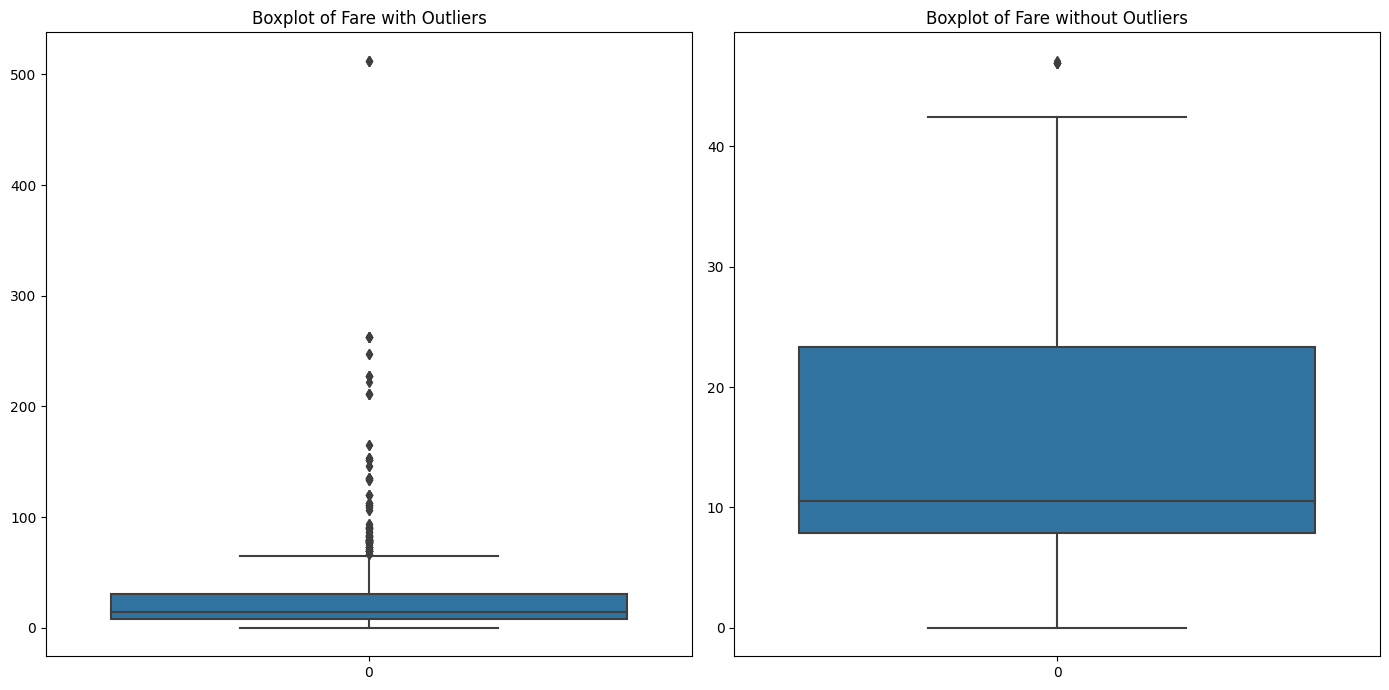

In [232]:
plt.figure(figsize=(14, 7))

# Boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(df['fare'])
plt.title('Boxplot of Fare with Outliers')

# Boxplot without outliers 
plt.subplot(1, 2, 2)
sns.boxplot(df1['fare'])
plt.title('Boxplot of Fare without Outliers')

plt.tight_layout()
plt.show()


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


Outliers detected:
     survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
7           0       3    male   2.00      3      1  21.0750        S   Third   
11          1       1  female  58.00      0      0  26.5500        S   First   
15          1       2  female  55.00      0      0  16.0000        S  Second   
16          0       3    male   2.00      4      1  29.1250        Q   Third   
33          0       2    male  66.00      0      0  10.5000        S  Second   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
827         1       2    male   1.00      0      2  37.0042        C  Second   
829         1       1  female  62.00      0      0  80.0000        S   First   
831         1       2    male   0.83      1      1  18.7500        S  Second   
851         0       3    male  74.00      0      0   7.7750        S   Third   
879         1       1  female  56.00      0      1  83.1583        C   First   

       who  adult_ma

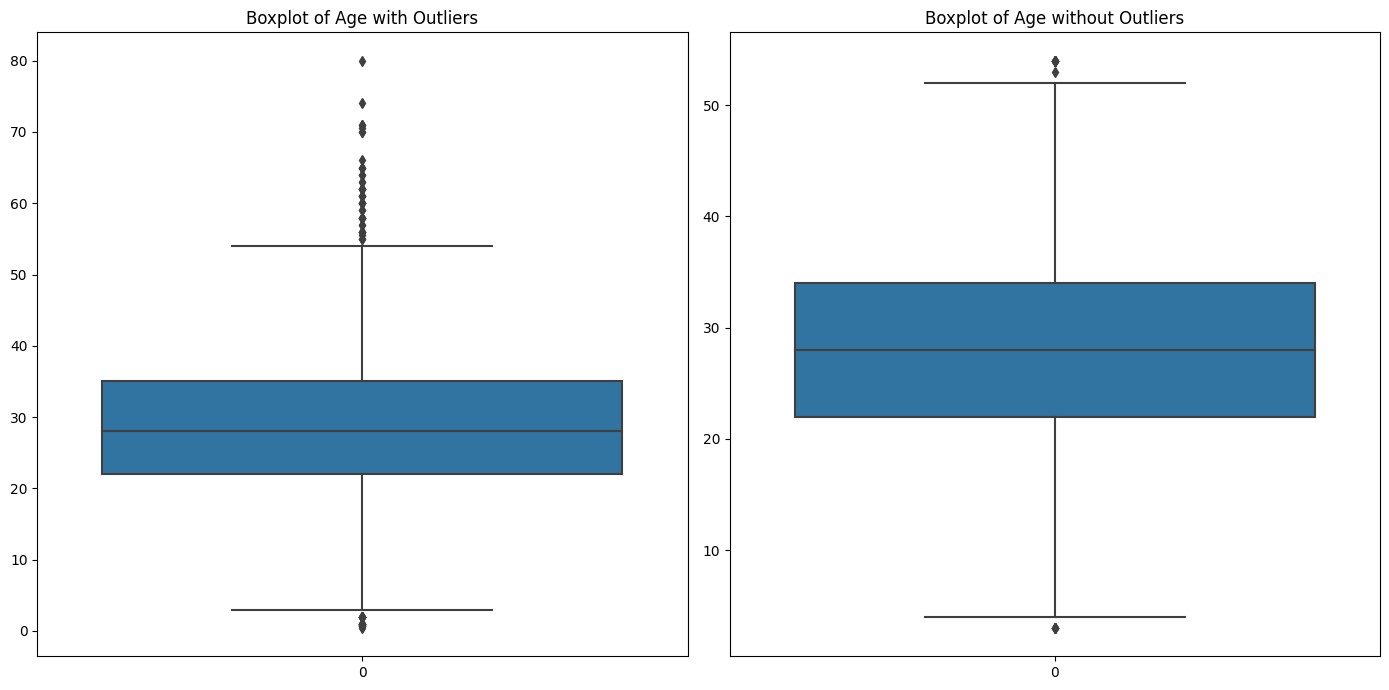

In [234]:
# Define a function to detect outliers using IQR
def detect_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Define a function to remove outliers using IQR
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Detect outliers in the age column
outliers_age = detect_outliers_IQR(df, 'age')
print("Outliers detected:")
print(outliers_age)

#create a new DataFrame df2
df2 = df.drop(outliers_age.index)  # Drop rows containing outliers

# Create boxplots for comparison
plt.figure(figsize=(14, 7))

# Boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(df['age'])
plt.title('Boxplot of Age with Outliers')

# Boxplot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(df2['age'])
plt.title('Boxplot of Age without Outliers')

plt.tight_layout()
plt.show()


### Analysis on survived column 

sex
male      64.758698
female    35.241302
Name: count, dtype: float64


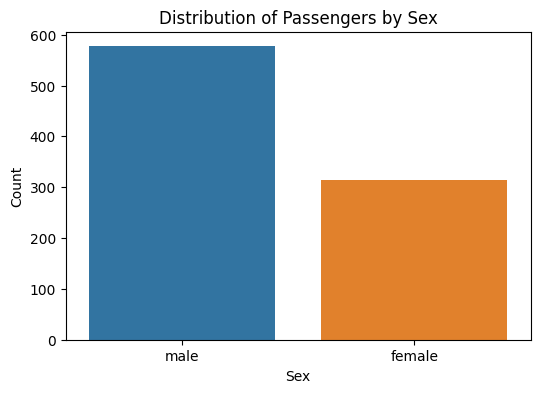

the majority of deaths were of males


In [235]:
# percentage of male and female
sex_distribution = (df['sex'].value_counts() / 891) * 100
print(sex_distribution)

# Visualize the distribution of passengers by sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# conclusion
print("the majority of deaths were of males")

sibsp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


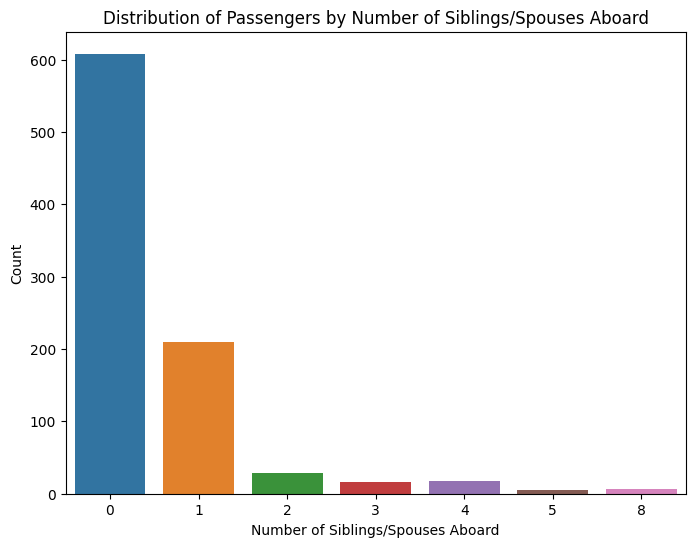

The majority of passengers had 0 siblings/spouses aboard the Titanic


In [236]:
# percentage
sibsp_distribution = (df['sibsp'].value_counts() / 891) * 100
print(sibsp_distribution)

# Visualize the distribution of passengers by sibsp
plt.figure(figsize=(8, 6))
sns.countplot(x='sibsp', data=df)
plt.title('Distribution of Passengers by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()


# Conclusion line
print("The majority of passengers had 0 siblings/spouses aboard the Titanic")


In [237]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


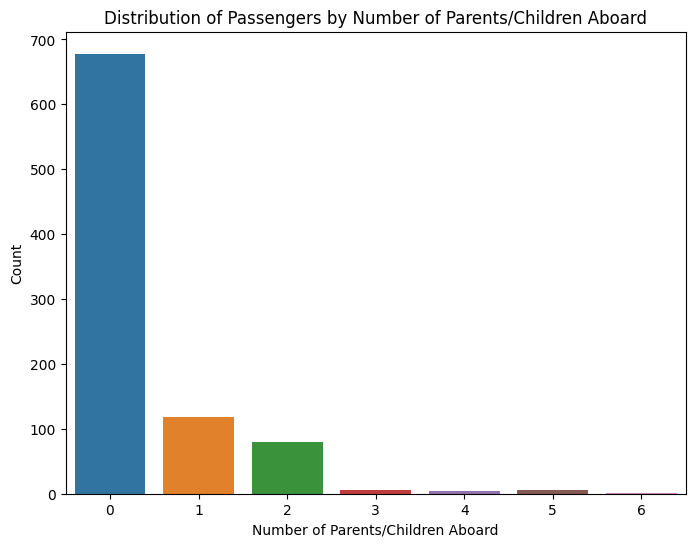

The majority of passengers had 0 parents/children aboard the Titanic


In [238]:
# percentage
parch_distribution = (df['parch'].value_counts() / 891) * 100
print(parch_distribution)

# Visualize the distribution of passengers by parch
plt.figure(figsize=(8, 6))
sns.countplot(x='parch', data=df)
plt.title('Distribution of Passengers by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

# Conclusion line
print("The majority of passengers had 0 parents/children aboard the Titanic")


pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


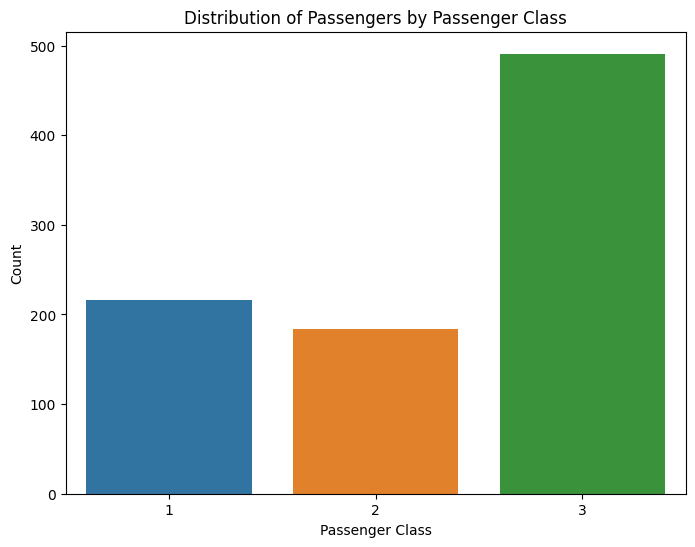

The majority of passengers were in the 3rd class on the Titanic


In [239]:
#percentage distribution of passengers by pclass
pclass_distribution = (df['pclass'].value_counts() / 891) * 100
print(pclass_distribution)

# Visualize the distribution of passengers by pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df)
plt.title('Distribution of Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Conclusion line
print("The majority of passengers were in the 3rd class on the Titanic")


embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


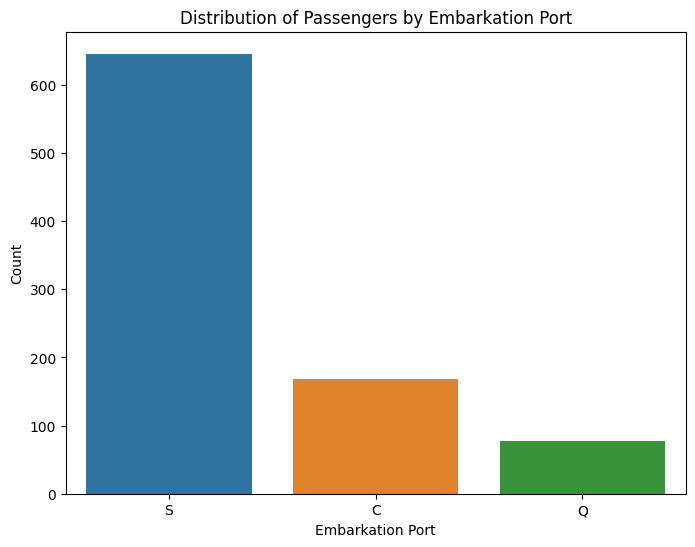

The majority of passengers embarked from port'S'(Southampton)


In [240]:
# percentage distribution of passengers by embarked
embarked_distribution = (df['embarked'].value_counts() / 891) * 100
print(embarked_distribution)

# Visualize the distribution of passengers by embarked
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=df)
plt.title('Distribution of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

# Conclusion line
print("The majority of passengers embarked from port'S'(Southampton)")


Model Training:

Select one machine learning model suitable for the given dataset and problem (e.g., Logistic Regression for classification).

Split the data into training and testing sets.
Train the model on the training set.


## Logistic Regression is a good starting point due to its simplicity and interpretability. It can provide baseline performance metrics and insights into feature importance.



### LOADING THE DATASET

In [241]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### We will map the values of male as 1 and female as 0 respectively which is known as binary encoding. It helps in converting categorical columns into numerical format
### Machine learning algorithms require numerical inputs, so converting categorical variables like 'sex' into numerical values ensures compatibility with these algorithm

In [242]:
# Map 'male' to 1 and 'female' to 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

print(df.head())


   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male  embark_town alive  alone  
0        True  Southampton    no  False  
1       False    Cherbourg   yes  False  
2       False  Southampton   yes   True  
3       False  Southampton   yes  False  
4        True  Southampton    no   True  


In [243]:
print(df["sex"].unique()) #checking the mapped values

[1 0]


In [244]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### The selected features are 'pclass', 'age', 'sibsp', 'parch', 'fare', and 'sex'. These columns are used to create the feature matrix x.

### survived column represents whether a passenger survived (1) or not (0) and is used to create the target vector y.

###  The feature matrix x and target vector y are prepared for use in machine learning models. x contains the independent variables that the model will use to make predictions, and y contains the dependent variable that the model will learn to predict.


In [245]:
# seperate dependent and independent variables

x = df[["pclass","age","sibsp","parch","fare","sex"]]
y = df["survived"]

In [246]:
x

,pclass,age,sibsp,parch,fare,sex
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,28.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [247]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## Data Modelling Using Linear Regression

In [248]:
# build the model

In [249]:
# import train test split method

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
# train test split

In [252]:
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

### Dataset splits into testing and training sets.  The train_test_split function from sklearn.model_selection is used to randomly divide the data into two parts: one for training the model (x_train and y_train) and one for evaluating the model (x_test and y_test).

### The test_size=0.33 parameter specifies that 33% of the data should be allocated to the test set, while the remaining 67% will be used for training

### The random_state=42 parameter sets a seed for the random number generator

In [253]:
# import logistic regression

In [254]:
from sklearn.linear_model import LogisticRegression

In [255]:
# fitting of the logistic regression

In [256]:
lr = LogisticRegression(max_iter = 200)

### lr is an instance of the logistic regression model configured to allow up to 200 iterations for convergence.

In [262]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [263]:
predict = lr.predict(x_test)

In [267]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predict = lr.predict(x_test) 

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predict))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.82      0.72      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

Confusion Matrix:
[[156  19]
 [ 34  86]]


In [270]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1.0, 10.0]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Fit the model with the best parameters
best_lr = grid_search.best_estimator_
best_lr.fit(x_train, y_train)


Best parameters found: {'C': 1.0}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [274]:
import joblib
import numpy as np

# Load the model for deployment
loaded_model = joblib.load('logistic_regression_model.pkl')

# Example new data for prediction (should be preprocessed in the same way as training data)
# Example: [pclass, sex (1 for male, 0 for female), age, sibsp, parch, fare]
new_data = np.array([[1, 0, 25.0, 0, 0, 50.0]])  # Adjust values as needed

# Make prediction
prediction = loaded_model.predict(new_data)

# Interpret prediction
if prediction[0] == 1:
    print("The passenger is predicted to survive.")
else:
    print("The passenger is predicted not to survive.")


The passenger is predicted not to survive.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
